In [1]:
import pandas as pd

df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.info()
df.describe()
df["Attrition"].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


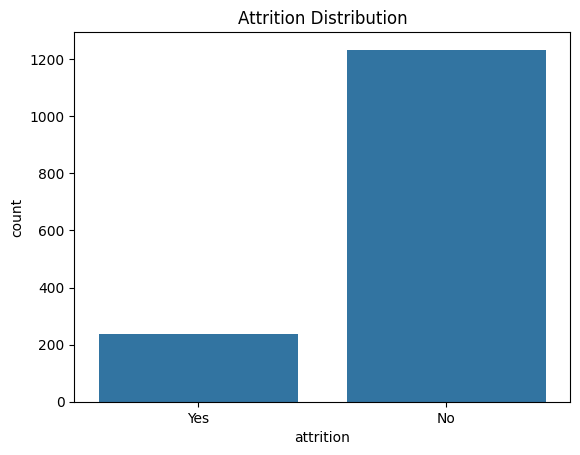

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["attrition"])
plt.title("Attrition Distribution")
plt.show()


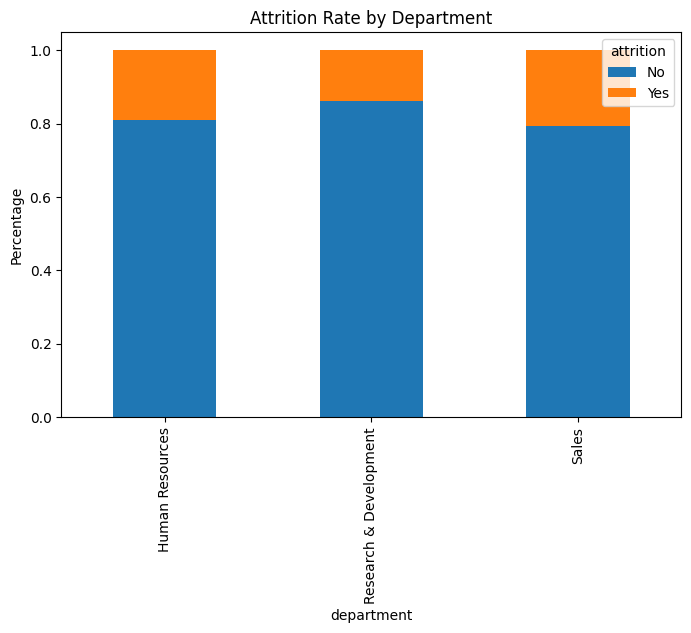

In [5]:
attrition_by_dept = df.groupby("department")["attrition"].value_counts(normalize=True).unstack()
attrition_by_dept.plot(kind="bar", figsize=(8,5), stacked=True)
plt.title("Attrition Rate by Department")
plt.ylabel("Percentage")
plt.show()


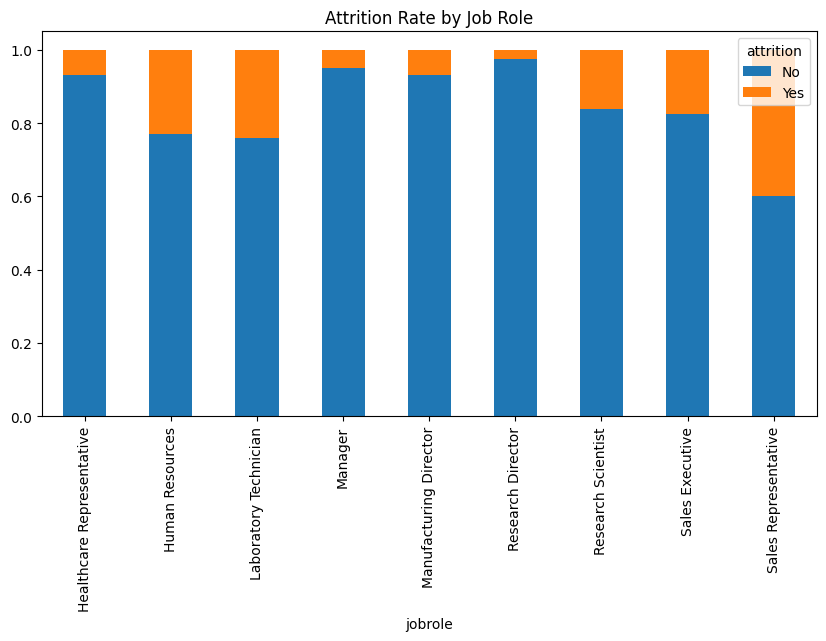

In [8]:
attrition_by_jobrole = df.groupby("jobrole")["attrition"].value_counts(normalize=True).unstack()
attrition_by_jobrole.plot(kind="bar", figsize=(10,5), stacked=True)
plt.title("Attrition Rate by Job Role")
plt.show()


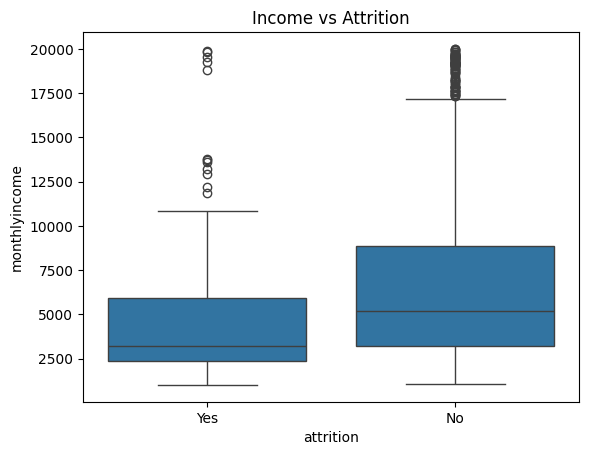

In [10]:
sns.boxplot(x="attrition", y="monthlyincome", data=df)
plt.title("Income vs Attrition")
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
X = df_encoded.drop("attrition", axis=1)
y = df_encoded["attrition"]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8401360544217688
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.53       294
weighted avg       0.79      0.84      0.79       294



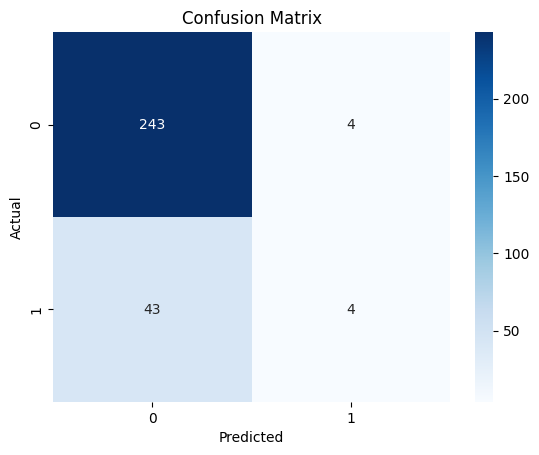

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After:", y_train_sm.value_counts())


Before: attrition
0    986
1    190
Name: count, dtype: int64
After: attrition
0    986
1    986
Name: count, dtype: int64


In [17]:
rf_sm = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = rf_sm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_sm))
print(classification_report(y_test, y_pred_sm))


Accuracy: 0.8027210884353742
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.37      0.32      0.34        47

    accuracy                           0.80       294
   macro avg       0.62      0.61      0.61       294
weighted avg       0.79      0.80      0.80       294



In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.03,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.8163265306122449
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       247
           1       0.41      0.36      0.39        47

    accuracy                           0.82       294
   macro avg       0.65      0.63      0.64       294
weighted avg       0.81      0.82      0.81       294



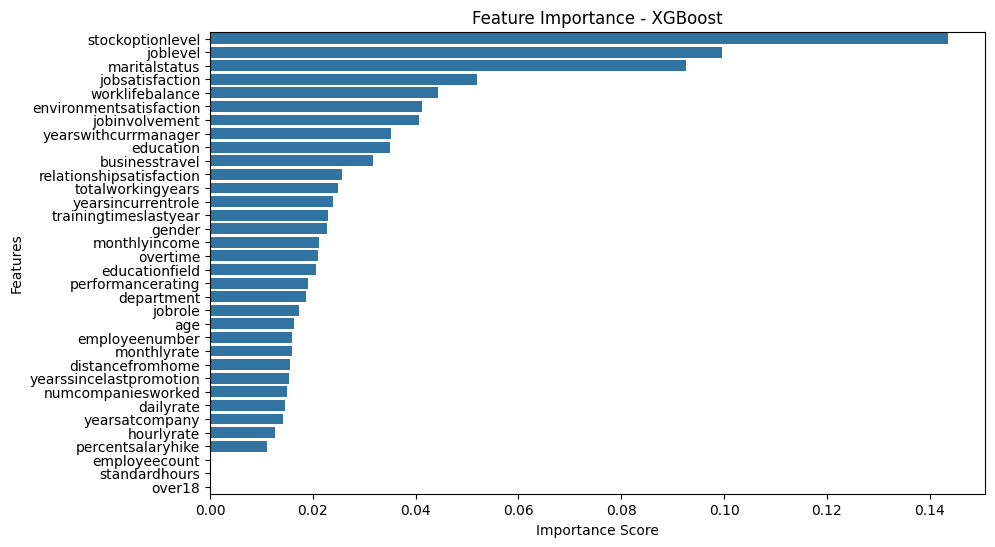

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [20]:
import joblib

joblib.dump(xgb, "../app/model.pkl")  
joblib.dump(le, "../app/label_encoder.pkl")


['../app/label_encoder.pkl']

In [21]:
import joblib

joblib.dump(list(X.columns), "../app/feature_names.pkl")


['../app/feature_names.pkl']